# This code takes in a .csv file that was generated by for_rose_3.ijm (code that iterates over each image of a Nissl series in Image J and lets the user demarcate the lamina, lesion, Area X, and LMAN). It calculates the area of the lesion, Area X, and LMAN. Then, it calculates the overlap between the lesion and Area X, the lesion and LMAN, and calculates how much of the lesion was above the striatum.

### Load the .csv file

In [8]:
import pandas as pd

# Path to your CSV file
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'

# Load the CSV file into a DataFrame
lesion_area_df = pd.read_csv(csv_path)

# Display the first few rows to check the structure
print(lesion_area_df.head())

                     Image Name  \
0  42624.01_sect10_NISSL_5x.jpg   
1  42624.01_sect11_NISSL_5x.jpg   
2  42624.01_sect12_NISSL_5x.jpg   
3  42624.01_sect13_NISSL_5x.jpg   
4  42624.01_sect14_NISSL_5x.jpg   

                                   Striatum_x_coords  \
0  4752, 4734, 4692, 4680, 4650, 4602, 4554, 4512...   
1  4710, 4656, 4614, 4602, 4584, 4566, 4560, 4548...   
2  4698, 4692, 4692, 4686, 4680, 4674, 4668, 4662...   
3  4290, 4284, 4278, 4266, 4260, 4242, 4230, 4218...   
4  4224, 4218, 4212, 4206, 4200, 4194, 4188, 4176...   

                                   Striatum_y_coords  \
0  1854, 1854, 1854, 1854, 1854, 1854, 1854, 1854...   
1  2202, 2196, 2190, 2190, 2190, 2190, 2190, 2190...   
2  2070, 2070, 2064, 2064, 2058, 2052, 2052, 2046...   
3  1368, 1368, 1368, 1362, 1362, 1362, 1356, 1356...   
4  1410, 1404, 1404, 1404, 1404, 1404, 1404, 1404...   

                                     Lesion_x_coords  \
0                                       none present   
1  

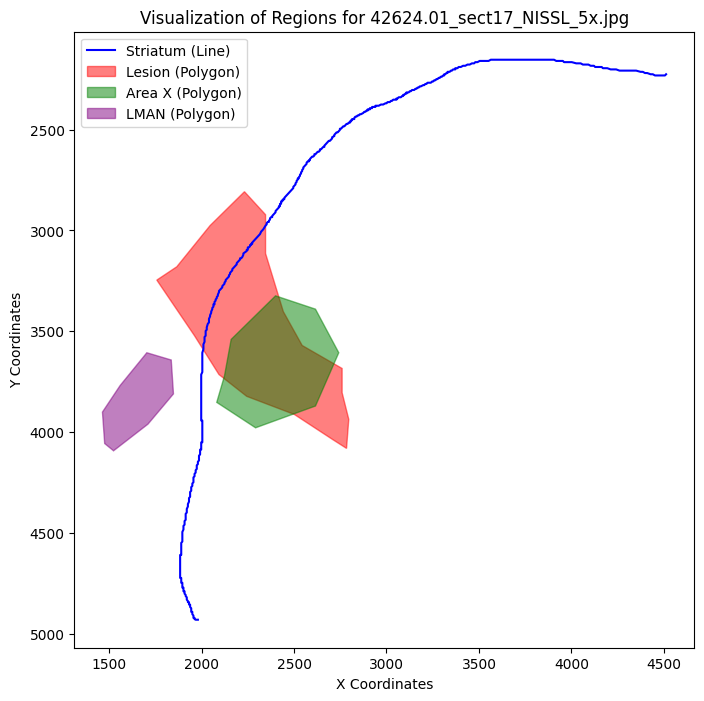

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # to convert coordinate strings to lists

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization
selected_row = df.iloc[6]  # You can change the index to visualize another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse the coordinates for each area
striatum_x = parse_coords(selected_row['Striatum_x_coords'])
striatum_y = parse_coords(selected_row['Striatum_y_coords'])
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])
lman_x = parse_coords(selected_row['LMAN_x_coords'])
lman_y = parse_coords(selected_row['LMAN_y_coords'])

# Plot the areas
plt.figure(figsize=(8, 8))
if striatum_x and striatum_y:
    plt.plot(striatum_x, striatum_y, label='Striatum (Line)', color='blue')
if lesion_x and lesion_y:
    plt.fill(lesion_x, lesion_y, label='Lesion (Polygon)', color='red', alpha=0.5)
if area_x_x and area_x_y:
    plt.fill(area_x_x, area_x_y, label='Area X (Polygon)', color='green', alpha=0.5)
if lman_x and lman_y:
    plt.fill(lman_x, lman_y, label='LMAN (Polygon)', color='purple', alpha=0.5)

# Customize plot
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Visualization of Regions for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()  # Invert Y axis to match typical image coordinate systems
plt.show()


In [5]:
# import pandas as pd

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Select one image row for area calculation
# selected_row = df.iloc[0]  # Change the index to calculate areas for another row if needed

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Function to calculate the area of a polygon using the Shoelace formula
# def calculate_polygon_area(x_coords, y_coords):
#     if x_coords is None or y_coords is None:
#         return 0
#     n = len(x_coords)
#     area = 0.5 * abs(sum(x_coords[i] * y_coords[(i + 1) % n] - y_coords[i] * x_coords[(i + 1) % n] for i in range(n)))
#     return area

# # Extract and parse the coordinates for each area
# lesion_x = parse_coords(selected_row['Lesion_x_coords'])
# lesion_y = parse_coords(selected_row['Lesion_y_coords'])
# area_x_x = parse_coords(selected_row['Area_X_x_coords'])
# area_x_y = parse_coords(selected_row['Area_X_y_coords'])
# lman_x = parse_coords(selected_row['LMAN_x_coords'])
# lman_y = parse_coords(selected_row['LMAN_y_coords'])

# # Calculate areas
# lesion_area = calculate_polygon_area(lesion_x, lesion_y)
# area_x_area = calculate_polygon_area(area_x_x, area_x_y)
# lman_area = calculate_polygon_area(lman_x, lman_y)

# # Print the results
# print(f"Lesion Area: {lesion_area}")
# print(f"Area X Area: {area_x_area}")
# print(f"LMAN Area: {lman_area}")


In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Select one image row for visualization and area calculation
# selected_row = df.iloc[4]  # Change the index to visualize and calculate areas for another row if needed

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Function to calculate the area of a polygon using the Shoelace formula
# def calculate_polygon_area(x_coords, y_coords):
#     if x_coords is None or y_coords is None:
#         return 0
#     n = len(x_coords)
#     area = 0.5 * abs(sum(x_coords[i] * y_coords[(i + 1) % n] - y_coords[i] * x_coords[(i + 1) % n] for i in range(n)))
#     return area

# # Extract and parse the coordinates for each area
# striatum_x = parse_coords(selected_row['Striatum_x_coords'])
# striatum_y = parse_coords(selected_row['Striatum_y_coords'])
# lesion_x = parse_coords(selected_row['Lesion_x_coords'])
# lesion_y = parse_coords(selected_row['Lesion_y_coords'])
# area_x_x = parse_coords(selected_row['Area_X_x_coords'])
# area_x_y = parse_coords(selected_row['Area_X_y_coords'])
# lman_x = parse_coords(selected_row['LMAN_x_coords'])
# lman_y = parse_coords(selected_row['LMAN_y_coords'])

# # Calculate areas
# lesion_area = calculate_polygon_area(lesion_x, lesion_y)
# area_x_area = calculate_polygon_area(area_x_x, area_x_y)
# lman_area = calculate_polygon_area(lman_x, lman_y)

# # Plot the areas
# plt.figure(figsize=(8, 8))
# if striatum_x and striatum_y:
#     plt.plot(striatum_x, striatum_y, label='Striatum (Line)', color='blue')
# if lesion_x and lesion_y:
#     plt.fill(lesion_x, lesion_y, label=f'Lesion (Polygon) - Area: {lesion_area}', color='red', alpha=0.5)
# if area_x_x and area_x_y:
#     plt.fill(area_x_x, area_x_y, label=f'Area X (Polygon) - Area: {area_x_area}', color='green', alpha=0.5)
# if lman_x and lman_y:
#     plt.fill(lman_x, lman_y, label=f'LMAN (Polygon) - Area: {lman_area}', color='purple', alpha=0.5)

# # Customize plot
# plt.xlabel("X Coordinates")
# plt.ylabel("Y Coordinates")
# plt.title(f"Visualization of Regions for {selected_row['Image Name']}")
# plt.legend()
# plt.gca().invert_yaxis()  # Invert Y axis to match typical image coordinate systems
# plt.show()

# # Print the areas
# print(f"Lesion Area: {lesion_area}")
# print(f"Area X Area: {area_x_area}")
# print(f"LMAN Area: {lman_area}")


In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Select one image row for visualization and area calculation
# selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Extract and parse the coordinates for each area
# lesion_x = parse_coords(selected_row['Lesion_x_coords'])
# lesion_y = parse_coords(selected_row['Lesion_y_coords'])
# area_x_x = parse_coords(selected_row['Area_X_x_coords'])
# area_x_y = parse_coords(selected_row['Area_X_y_coords'])

# # Create Polygon objects using Shapely if coordinates are present
# lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
# area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None

# # Calculate overlap area if both polygons exist
# if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon):
#     overlap_area = lesion_polygon.intersection(area_x_polygon).area
# else:
#     overlap_area = 0

# # Print the overlap area
# print(f"Overlap Area between Lesion and Area X: {overlap_area}")

# # Optional: Plotting the regions with Shapely polygons to visualize the overlap
# plt.figure(figsize=(8, 8))
# if lesion_polygon:
#     x, y = lesion_polygon.exterior.xy
#     plt.fill(x, y, color='red', alpha=0.5, label='Lesion Area')
# if area_x_polygon:
#     x, y = area_x_polygon.exterior.xy
#     plt.fill(x, y, color='green', alpha=0.5, label='Area X')
# plt.xlabel("X Coordinates")
# plt.ylabel("Y Coordinates")
# plt.title(f"Overlap of Lesion and Area X for {selected_row['Image Name']}")
# plt.legend()
# plt.gca().invert_yaxis()
# plt.show()


## Calcualte LMAN and lesion overlap

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Select one image row for visualization and area calculation
# selected_row = df.iloc[0]  # Change the index to visualize and calculate areas for another row if needed

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Extract and parse the coordinates for each area
# lesion_x = parse_coords(selected_row['Lesion_x_coords'])
# lesion_y = parse_coords(selected_row['Lesion_y_coords'])
# area_x_x = parse_coords(selected_row['Area_X_x_coords'])
# area_x_y = parse_coords(selected_row['Area_X_y_coords'])
# lman_x = parse_coords(selected_row['LMAN_x_coords'])
# lman_y = parse_coords(selected_row['LMAN_y_coords'])

# # Create Polygon objects using Shapely if coordinates are present
# lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
# area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
# lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None

# # Calculate overlap area for Lesion and Area X if both polygons exist
# if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon):
#     overlap_area_x = lesion_polygon.intersection(area_x_polygon).area
# else:
#     overlap_area_x = 0

# # Calculate overlap area for Lesion and LMAN if both polygons exist
# if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon):
#     overlap_lman = lesion_polygon.intersection(lman_polygon).area
# else:
#     overlap_lman = 0

# # Print the overlap areas
# print(f"Overlap Area between Lesion and Area X: {overlap_area_x}")
# print(f"Overlap Area between Lesion and LMAN: {overlap_lman}")

# # Optional: Plotting the regions to visualize overlaps
# plt.figure(figsize=(8, 8))
# if lesion_polygon:
#     x, y = lesion_polygon.exterior.xy
#     plt.fill(x, y, color='red', alpha=0.5, label='Lesion Area')
# if area_x_polygon:
#     x, y = area_x_polygon.exterior.xy
#     plt.fill(x, y, color='green', alpha=0.5, label='Area X')
# if lman_polygon:
#     x, y = lman_polygon.exterior.xy
#     plt.fill(x, y, color='purple', alpha=0.5, label='LMAN')
# plt.xlabel("X Coordinates")
# plt.ylabel("Y Coordinates")
# plt.title(f"Overlap of Lesion with Area X and LMAN for {selected_row['Image Name']}")
# plt.legend()
# plt.gca().invert_yaxis()
# plt.show()


## Calculate how much of the lesion was above and below the striatum

In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# from shapely.ops import split

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Select one image row for visualization and area calculation
# selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Extract and parse the coordinates for each area
# striatum_x = parse_coords(selected_row['Striatum_x_coords'])
# striatum_y = parse_coords(selected_row['Striatum_y_coords'])
# lesion_x = parse_coords(selected_row['Lesion_x_coords'])
# lesion_y = parse_coords(selected_row['Lesion_y_coords'])

# # Create Polygon and LineString objects using Shapely
# lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
# striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

# # Initialize variables for area calculation
# area_side_1, area_side_2 = 0, 0

# # Check if both the lesion polygon and striatum line are present
# if lesion_polygon and striatum_line:
#     # Check if the striatum line intersects the lesion polygon
#     if lesion_polygon.intersects(striatum_line):
#         # Split the lesion polygon by the striatum line
#         split_polygons = split(lesion_polygon, striatum_line)
        
#         # Check if the split result is not empty
#         if not split_polygons.is_empty:
#             # Calculate areas of each resulting polygon
#             area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
#         else:
#             print("The split operation returned an empty result. No valid intersection.")
#     else:
#         print("The striatum line does not intersect the lesion polygon.")
# else:
#     print("Either the lesion polygon or the striatum line is missing for this image.")

# # Print the areas on both sides of the striatum
# print(f"Lesion Area on one side of the Striatum: {area_side_1}")
# print(f"Lesion Area on the other side of the Striatum: {area_side_2}")

# # Optional: Plotting to visualize the split
# plt.figure(figsize=(8, 8))
# # Plot striatum line
# if striatum_line:
#     x, y = striatum_line.xy
#     plt.plot(x, y, color='blue', label='Striatum (Line)')
# # Plot original lesion
# if lesion_polygon:
#     x, y = lesion_polygon.exterior.xy
#     plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
# # Plot split parts of lesion if they exist
# if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
#     for i, poly in enumerate(split_polygons.geoms):
#         x, y = poly.exterior.xy
#         plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')

# plt.xlabel("X Coordinates")
# plt.ylabel("Y Coordinates")
# plt.title(f"Lesion Area Split by Striatum for {selected_row['Image Name']}")
# plt.legend()
# plt.gca().invert_yaxis()
# plt.show()


In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# from shapely.ops import split

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Select one image row for visualization and area calculation
# selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Extract and parse the coordinates for each area
# striatum_x = parse_coords(selected_row['Striatum_x_coords'])
# striatum_y = parse_coords(selected_row['Striatum_y_coords'])
# lesion_x = parse_coords(selected_row['Lesion_x_coords'])
# lesion_y = parse_coords(selected_row['Lesion_y_coords'])

# # Create Polygon and LineString objects using Shapely
# lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
# striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

# # Initialize variables for area calculation
# area_side_1, area_side_2 = 0, 0

# # Check if both the lesion polygon and striatum line are present
# if lesion_polygon and striatum_line:
#     # Check if the striatum line intersects the lesion polygon
#     if lesion_polygon.intersects(striatum_line):
#         # Split the lesion polygon by the striatum line
#         split_polygons = split(lesion_polygon, striatum_line)
        
#         # Check if the split result is not empty and contains exactly two parts
#         if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
#             # Calculate areas of each resulting polygon
#             area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
#         else:
#             print("The split operation returned an empty result or did not split into exactly two parts.")
#     else:
#         print("The striatum line does not intersect the lesion polygon.")
# else:
#     print("Either the lesion polygon or the striatum line is missing for this image.")

# # Display areas to the user
# print(f"Lesion Area Part 1: {area_side_1}")
# print(f"Lesion Area Part 2: {area_side_2}")

# # Plotting to visualize the split
# plt.figure(figsize=(8, 8))
# # Plot striatum line
# if striatum_line:
#     x, y = striatum_line.xy
#     plt.plot(x, y, color='blue', label='Striatum (Line)')
# # Plot original lesion
# if lesion_polygon:
#     x, y = lesion_polygon.exterior.xy
#     plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
# # Plot split parts of lesion
# if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
#     for i, poly in enumerate(split_polygons.geoms):
#         x, y = poly.exterior.xy
#         plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')

# plt.xlabel("X Coordinates")
# plt.ylabel("Y Coordinates")
# plt.title(f"Lesion Area Split by Striatum for {selected_row['Image Name']}")
# plt.legend()
# plt.gca().invert_yaxis()
# plt.show()

# # Prompt the user to specify which part is within the striatum
# striatum_part = input("Enter the part number (1 or 2) that is within the striatum: ")

# # Determine and print areas based on the user's input
# if striatum_part == '1':
#     inside_area, outside_area = area_side_1, area_side_2
# elif striatum_part == '2':
#     inside_area, outside_area = area_side_2, area_side_1
# else:
#     print("Invalid input. Please enter 1 or 2.")
#     inside_area, outside_area = 0, 0

# print(f"Lesion Area inside the Striatum (Ventral): {inside_area}")
# print(f"Lesion Area outside the Striatum (Dorsal): {outside_area}")


# Combine the codes:

In [11]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# from shapely.ops import split

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Select one image row for visualization and area calculation
# selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Extract and parse coordinates for each area
# striatum_x = parse_coords(selected_row['Striatum_x_coords'])
# striatum_y = parse_coords(selected_row['Striatum_y_coords'])
# lesion_x = parse_coords(selected_row['Lesion_x_coords'])
# lesion_y = parse_coords(selected_row['Lesion_y_coords'])
# area_x_x = parse_coords(selected_row['Area_X_x_coords'])
# area_x_y = parse_coords(selected_row['Area_X_y_coords'])
# lman_x = parse_coords(selected_row['LMAN_x_coords'])
# lman_y = parse_coords(selected_row['LMAN_y_coords'])

# # Create Polygon and LineString objects using Shapely if coordinates are present
# lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
# area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
# lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
# striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

# # Calculate areas of individual polygons
# lesion_area = lesion_polygon.area if lesion_polygon else 0
# area_x_area = area_x_polygon.area if area_x_polygon else 0
# lman_area = lman_polygon.area if lman_polygon else 0

# # Plot the regions
# plt.figure(figsize=(8, 8))
# if striatum_x and striatum_y:
#     plt.plot(striatum_x, striatum_y, label='Striatum (Line)', color='blue')
# if lesion_polygon:
#     x, y = lesion_polygon.exterior.xy
#     plt.fill(x, y, label=f'Lesion (Polygon) - Area: {lesion_area}', color='red', alpha=0.5)
# if area_x_polygon:
#     x, y = area_x_polygon.exterior.xy
#     plt.fill(x, y, label=f'Area X (Polygon) - Area: {area_x_area}', color='green', alpha=0.5)
# if lman_polygon:
#     x, y = lman_polygon.exterior.xy
#     plt.fill(x, y, label=f'LMAN (Polygon) - Area: {lman_area}', color='purple', alpha=0.5)

# plt.xlabel("X Coordinates")
# plt.ylabel("Y Coordinates")
# plt.title(f"Visualization of Regions for {selected_row['Image Name']}")
# plt.legend()
# plt.gca().invert_yaxis()  # Invert Y axis to match typical image coordinate systems
# plt.show()

# # Print individual polygon areas
# print(f"Lesion Area: {lesion_area}")
# print(f"Area X Area: {area_x_area}")
# print(f"LMAN Area: {lman_area}")

# # Calculate overlap area between lesion and Area X, if both are present
# overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0
# print(f"Overlap Area between Lesion and Area X: {overlap_area_x}")

# # Calculate overlap area between lesion and LMAN, if both are present
# overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0
# print(f"Overlap Area between Lesion and LMAN: {overlap_area_lman}")

# # If lesion and striatum are present, and they intersect, split the lesion by the striatum line
# if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
#     split_polygons = split(lesion_polygon, striatum_line)
#     if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
#         # Calculate areas of each resulting polygon part
#         area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
        
#         # Display areas of the split parts
#         print(f"Lesion Area Part 1: {area_side_1}")
#         print(f"Lesion Area Part 2: {area_side_2}")
        
#         # Plot the split parts for user identification
#         plt.figure(figsize=(8, 8))
#         if striatum_line:
#             x, y = striatum_line.xy
#             plt.plot(x, y, color='blue', label='Striatum (Line)')
#         if lesion_polygon:
#             x, y = lesion_polygon.exterior.xy
#             plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
#         for i, poly in enumerate(split_polygons.geoms):
#             x, y = poly.exterior.xy
#             plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
#         plt.xlabel("X Coordinates")
#         plt.ylabel("Y Coordinates")
#         plt.title(f"Lesion Area Split by Striatum for {selected_row['Image Name']}")
#         plt.legend()
#         plt.gca().invert_yaxis()
#         plt.show()

#         # Prompt the user to specify which part is within the striatum
#         striatum_part = input("Enter the part number (1 or 2) that is within the striatum: ")

#         # Determine and print areas based on the user's input
#         if striatum_part == '1':
#             inside_area, outside_area = area_side_1, area_side_2
#         elif striatum_part == '2':
#             inside_area, outside_area = area_side_2, area_side_1
#         else:
#             print("Invalid input. Please enter 1 or 2.")
#             inside_area, outside_area = 0, 0

#         print(f"Lesion Area inside the Striatum (Ventral): {inside_area}")
#         print(f"Lesion Area outside the Striatum (Dorsal): {outside_area}")
#     else:
#         print("The split operation did not return exactly two parts.")
# else:
#     print("Either the lesion polygon or striatum line is missing, or they do not intersect.")


## Now, update the code to iterate over each row from the .csv, and save the data into dataframes

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# from shapely.ops import split

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Initialize an empty list to store results
# results = []

# # Iterate over each row in the DataFrame
# for index, row in df.iterrows():
#     # Extract and parse coordinates for each area
#     striatum_x = parse_coords(row['Striatum_x_coords'])
#     striatum_y = parse_coords(row['Striatum_y_coords'])
#     lesion_x = parse_coords(row['Lesion_x_coords'])
#     lesion_y = parse_coords(row['Lesion_y_coords'])
#     area_x_x = parse_coords(row['Area_X_x_coords'])
#     area_x_y = parse_coords(row['Area_X_y_coords'])
#     lman_x = parse_coords(row['LMAN_x_coords'])
#     lman_y = parse_coords(row['LMAN_y_coords'])

#     # Create Polygon and LineString objects using Shapely if coordinates are present
#     lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
#     area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
#     lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
#     striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

#     # Calculate areas of individual polygons
#     lesion_area = lesion_polygon.area if lesion_polygon else 0
#     area_x_area = area_x_polygon.area if area_x_polygon else 0
#     lman_area = lman_polygon.area if lman_polygon else 0

#     # Calculate overlap area between lesion and Area X, if both are present
#     overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0

#     # Calculate overlap area between lesion and LMAN, if both are present
#     overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0

#     # Initialize variables for split areas if striatum and lesion are present
#     inside_area, outside_area = 0, 0

#     # If lesion and striatum are present, and they intersect, split the lesion by the striatum line
#     if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
#         split_polygons = split(lesion_polygon, striatum_line)
#         if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
#             # Calculate areas of each resulting polygon part
#             area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
            
#             # Plot the split parts for user identification
#             plt.figure(figsize=(8, 8))
#             if striatum_line:
#                 x, y = striatum_line.xy
#                 plt.plot(x, y, color='blue', label='Striatum (Line)')
#             if lesion_polygon:
#                 x, y = lesion_polygon.exterior.xy
#                 plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
#             for i, poly in enumerate(split_polygons.geoms):
#                 x, y = poly.exterior.xy
#                 plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
#             plt.xlabel("X Coordinates")
#             plt.ylabel("Y Coordinates")
#             plt.title(f"Lesion Area Split by Striatum for {row['Image Name']}")
#             plt.legend()
#             plt.gca().invert_yaxis()
#             plt.show()

#             # Prompt the user to specify which part is within the striatum
#             striatum_part = input(f"Enter the part number (1 or 2) that is within the striatum for {row['Image Name']}: ")

#             # Determine areas based on the user's input
#             if striatum_part == '1':
#                 inside_area, outside_area = area_side_1, area_side_2
#             elif striatum_part == '2':
#                 inside_area, outside_area = area_side_2, area_side_1
#             else:
#                 print("Invalid input. Setting inside and outside areas to 0.")

#     # Append the results for the current row to the results list
#     results.append({
#         "Image Name": row['Image Name'],
#         "Lesion Area": lesion_area,
#         "Area X Area": area_x_area,
#         "LMAN Area": lman_area,
#         "Overlap Area with Area X": overlap_area_x,
#         "Overlap Area with LMAN": overlap_area_lman,
#         "Lesion Area inside Striatum (Ventral)": inside_area,
#         "Lesion Area outside Striatum (Dorsal)": outside_area
#     })

# # Convert the results list to a DataFrame
# results_df = pd.DataFrame(results)

# # Save the results DataFrame to a CSV file
# #results_df.to_csv('lesion_analysis_results.csv', index=False)

# print(results_df.head())
# #print("Analysis complete. Results saved to 'lesion_analysis_results.csv'.")

In [13]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# from shapely.ops import split
# import re

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Helper function to extract section number from the image file name
# def get_section_number(image_name):
#     match = re.search(r'sect(\d+)', image_name)
#     if match:
#         return int(match.group(1))
#     else:
#         return None  # Return None if no section number is found

# # Initialize an empty list to store results
# results = []

# # Iterate over each row in the DataFrame
# for index, row in df.iterrows():
#     # Extract and parse coordinates for each area
#     striatum_x = parse_coords(row['Striatum_x_coords'])
#     striatum_y = parse_coords(row['Striatum_y_coords'])
#     lesion_x = parse_coords(row['Lesion_x_coords'])
#     lesion_y = parse_coords(row['Lesion_y_coords'])
#     area_x_x = parse_coords(row['Area_X_x_coords'])
#     area_x_y = parse_coords(row['Area_X_y_coords'])
#     lman_x = parse_coords(row['LMAN_x_coords'])
#     lman_y = parse_coords(row['LMAN_y_coords'])

#     # Get the section number from the image name
#     section_number = get_section_number(row['Image Name'])

#     # Create Polygon and LineString objects using Shapely if coordinates are present
#     lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
#     area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
#     lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
#     striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

#     # Calculate areas of individual polygons
#     lesion_area = lesion_polygon.area if lesion_polygon else 0
#     area_x_area = area_x_polygon.area if area_x_polygon else 0
#     lman_area = lman_polygon.area if lman_polygon else 0

#     # Calculate overlap area between lesion and Area X, if both are present
#     overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0

#     # Calculate overlap area between lesion and LMAN, if both are present
#     overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0

#     # Initialize variables for split areas if striatum and lesion are present
#     inside_area, outside_area = 0, 0

#     # If lesion and striatum are present, and they intersect, split the lesion by the striatum line
#     if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
#         split_polygons = split(lesion_polygon, striatum_line)
#         if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
#             # Calculate areas of each resulting polygon part
#             area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
            
#             # Plot the split parts for user identification
#             plt.figure(figsize=(8, 8))
#             if striatum_line:
#                 x, y = striatum_line.xy
#                 plt.plot(x, y, color='blue', label='Striatum (Line)')
#             if lesion_polygon:
#                 x, y = lesion_polygon.exterior.xy
#                 plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
#             for i, poly in enumerate(split_polygons.geoms):
#                 x, y = poly.exterior.xy
#                 plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
#             plt.xlabel("X Coordinates")
#             plt.ylabel("Y Coordinates")
#             plt.title(f"Lesion Area Split by Striatum for {row['Image Name']}")
#             plt.legend()
#             plt.gca().invert_yaxis()
#             plt.show()

#             # Prompt the user to specify which part is within the striatum
#             striatum_part = input(f"Enter the part number (1 or 2) that is within the striatum for {row['Image Name']}: ")

#             # Determine areas based on the user's input
#             if striatum_part == '1':
#                 inside_area, outside_area = area_side_1, area_side_2
#             elif striatum_part == '2':
#                 inside_area, outside_area = area_side_2, area_side_1
#             else:
#                 print("Invalid input. Setting inside and outside areas to 0.")

#     # Append the results for the current row to the results list
#     results.append({
#         "Image Name": row['Image Name'],
#         "Section Number": section_number,
#         "Lesion Area": lesion_area,
#         "Area X Area": area_x_area,
#         "LMAN Area": lman_area,
#         "Overlap Area with Area X": overlap_area_x,
#         "Overlap Area with LMAN": overlap_area_lman,
#         "Lesion Area inside Striatum (Posterior)": inside_area,
#         "Lesion Area outside Striatum (Anterior)": outside_area
#     })

# # Convert the results list to a DataFrame
# results_df = pd.DataFrame(results)

# # Save the results DataFrame to a CSV file
# results_df.to_csv('lesion_analysis_results_with_section.csv', index=False)

# print("Analysis complete. Results saved to 'lesion_analysis_results_with_section.csv'.")
# print(results_df.head())


In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# from shapely.ops import split
# import re

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Define a constant for section thickness
# section_thickness = 75  # 

# # Helper function to convert coordinates from strings to lists
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# # Helper function to extract section number from the image file name
# def get_section_number(image_name):
#     match = re.search(r'sect(\d+)', image_name)
#     if match:
#         return int(match.group(1))
#     else:
#         return None  # Return None if no section number is found

# # Initialize an empty list to store results
# results = []

# # Iterate over each row in the DataFrame
# for index, row in df.iterrows():
#     # Extract and parse coordinates for each area
#     striatum_x = parse_coords(row['Striatum_x_coords'])
#     striatum_y = parse_coords(row['Striatum_y_coords'])
#     lesion_x = parse_coords(row['Lesion_x_coords'])
#     lesion_y = parse_coords(row['Lesion_y_coords'])
#     area_x_x = parse_coords(row['Area_X_x_coords'])
#     area_x_y = parse_coords(row['Area_X_y_coords'])
#     lman_x = parse_coords(row['LMAN_x_coords'])
#     lman_y = parse_coords(row['LMAN_y_coords'])

#     # Get the section number from the image name
#     section_number = get_section_number(row['Image Name'])

#     # Create Polygon and LineString objects using Shapely if coordinates are present
#     lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
#     area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
#     lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
#     striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

#     # Calculate areas of individual polygons
#     lesion_area = lesion_polygon.area if lesion_polygon else 0
#     area_x_area = area_x_polygon.area if area_x_polygon else 0
#     lman_area = lman_polygon.area if lman_polygon else 0

#     # Calculate overlap area between lesion and Area X, if both are present
#     overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0

#     # Calculate overlap area between lesion and LMAN, if both are present
#     overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0

#     # Initialize variables for split areas if striatum and lesion are present
#     inside_area, outside_area = 0, 0

#     # If lesion and striatum are present, and they intersect, split the lesion by the striatum line
#     if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
#         split_polygons = split(lesion_polygon, striatum_line)
#         if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
#             # Calculate areas of each resulting polygon part
#             area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
            
#             # Plot the split parts for user identification
#             plt.figure(figsize=(8, 8))
#             if striatum_line:
#                 x, y = striatum_line.xy
#                 plt.plot(x, y, color='blue', label='Striatum (Line)')
#             if lesion_polygon:
#                 x, y = lesion_polygon.exterior.xy
#                 plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
#             for i, poly in enumerate(split_polygons.geoms):
#                 x, y = poly.exterior.xy
#                 plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
#             plt.xlabel("X Coordinates")
#             plt.ylabel("Y Coordinates")
#             plt.title(f"Lesion Area Split by Striatum for {row['Image Name']}")
#             plt.legend()
#             plt.gca().invert_yaxis()
#             plt.show()

#             # Prompt the user to specify which part is within the striatum
#             striatum_part = input(f"Enter the part number (1 or 2) that is within the striatum for {row['Image Name']}: ")

#             # Determine areas based on the user's input
#             if striatum_part == '1':
#                 inside_area, outside_area = area_side_1, area_side_2
#             elif striatum_part == '2':
#                 inside_area, outside_area = area_side_2, area_side_1
#             else:
#                 print("Invalid input. Setting inside and outside areas to 0.")

#     # Append the results for the current row to the results list
#     results.append({
#         "Image Name": row['Image Name'],
#         "Section Number": section_number,
#         "Section Thickness (um)": section_thickness,
#         "Lesion Area": lesion_area,
#         "Area X Area": area_x_area,
#         "LMAN Area": lman_area,
#         "Overlap Area with Area X": overlap_area_x,
#         "Overlap Area with LMAN": overlap_area_lman,
#         "Lesion Area inside Striatum (Posterior)": inside_area,
#         "Lesion Area outside Striatum (Anterior)": outside_area
#     })

# # Convert the results list to a DataFrame
# results_df = pd.DataFrame(results)

# # Save the results DataFrame to a CSV file
# results_df.to_csv('lesion_analysis_results_with_section.csv', index=False)

# print("Analysis complete. Results saved to 'lesion_analysis_results_with_section.csv'.")
# print(results_df.head(6))


In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# from shapely.ops import split
# import re

# # Load the CSV data into a DataFrame
# csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
# df = pd.read_csv(csv_path)

# # Define constants for section thickness and pixel-to-micron conversion
# section_thickness = 75
# conversion_factor = 500 / 568  # conversion factor from pixels to microns

# # Helper functions
# def parse_coords(coord_string):
#     if coord_string.lower() == "none present":
#         return None
#     return [int(coord) for coord in coord_string.split(",")]

# def get_section_number(image_name):
#     match = re.search(r'sect(\d+)', image_name)
#     if match:
#         return int(match.group(1))
#     else:
#         return None

# # Initialize an empty list to store results
# results = []

# # Iterate over each row in the DataFrame
# for index, row in df.iterrows():
#     # Parse coordinates
#     striatum_x = parse_coords(row['Striatum_x_coords'])
#     striatum_y = parse_coords(row['Striatum_y_coords'])
#     lesion_x = parse_coords(row['Lesion_x_coords'])
#     lesion_y = parse_coords(row['Lesion_y_coords'])
#     area_x_x = parse_coords(row['Area_X_x_coords'])
#     area_x_y = parse_coords(row['Area_X_y_coords'])
#     lman_x = parse_coords(row['LMAN_x_coords'])
#     lman_y = parse_coords(row['LMAN_y_coords'])

#     # Get the section number from the image name
#     section_number = get_section_number(row['Image Name'])

#     # Create Polygon and LineString objects
#     lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
#     area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
#     lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
#     striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

#     # Calculate areas in pixels
#     lesion_area = lesion_polygon.area if lesion_polygon else 0
#     area_x_area = area_x_polygon.area if area_x_polygon else 0
#     lman_area = lman_polygon.area if lman_polygon else 0
#     overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0
#     overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0

#     # Calculate areas in microns
#     lesion_area_um2 = lesion_area * (conversion_factor ** 2)
#     area_x_area_um2 = area_x_area * (conversion_factor ** 2)
#     lman_area_um2 = lman_area * (conversion_factor ** 2)
#     overlap_area_x_um2 = overlap_area_x * (conversion_factor ** 2)
#     overlap_area_lman_um2 = overlap_area_lman * (conversion_factor ** 2)

#     # Initialize split areas
#     inside_area, outside_area = 0, 0
#     inside_area_um2, outside_area_um2 = 0, 0

#     # Split lesion by striatum line if intersecting
#     if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
#         split_polygons = split(lesion_polygon, striatum_line)
#         if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
#             area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
#             area_side_1_um2, area_side_2_um2 = [area * (conversion_factor ** 2) for area in [area_side_1, area_side_2]]
            
#             # Plot for user identification
#             plt.figure(figsize=(8, 8))
#             if striatum_line:
#                 x, y = striatum_line.xy
#                 plt.plot(x, y, color='blue', label='Striatum (Line)')
#             if lesion_polygon:
#                 x, y = lesion_polygon.exterior.xy
#                 plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
#             for i, poly in enumerate(split_polygons.geoms):
#                 x, y = poly.exterior.xy
#                 plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
#             plt.xlabel("X Coordinates")
#             plt.ylabel("Y Coordinates")
#             plt.title(f"Lesion Area Split by Striatum for {row['Image Name']}")
#             plt.legend()
#             plt.gca().invert_yaxis()
#             plt.show()

#             # Prompt for striatum part identification
#             striatum_part = input(f"Enter the part number (1 or 2) that is within the striatum for {row['Image Name']}: ")

#             # Set areas based on input
#             if striatum_part == '1':
#                 inside_area, outside_area = area_side_1, area_side_2
#                 inside_area_um2, outside_area_um2 = area_side_1_um2, area_side_2_um2
#             elif striatum_part == '2':
#                 inside_area, outside_area = area_side_2, area_side_1
#                 inside_area_um2, outside_area_um2 = area_side_2_um2, area_side_1_um2
#             else:
#                 print("Invalid input. Setting inside and outside areas to 0.")

#     # Append results
#     results.append({
#         "Image Name": row['Image Name'],
#         "Section Number": section_number,
#         "Section Thickness (um)": section_thickness,
#         "Lesion Area": lesion_area,
#         "Lesion Area (um^2)": lesion_area_um2,
#         "Area X Area": area_x_area,
#         "Area X Area (um^2)": area_x_area_um2,
#         "LMAN Area": lman_area,
#         "LMAN Area (um^2)": lman_area_um2,
#         "Overlap Area with Area X": overlap_area_x,
#         "Overlap Area with Area X (um^2)": overlap_area_x_um2,
#         "Overlap Area with LMAN": overlap_area_lman,
#         "Overlap Area with LMAN (um^2)": overlap_area_lman_um2,
#         "Lesion Area inside Striatum (Posterior)": inside_area,
#         "Lesion Area inside Striatum (Posterior) (um^2)": inside_area_um2,
#         "Lesion Area outside Striatum (Anterior)": outside_area,
#         "Lesion Area outside Striatum (Anterior) (um^2)": outside_area_um2
#     })

# # Convert results to DataFrame and save
# results_df = pd.DataFrame(results)
# results_df.to_csv('lesion_analysis_results_with_section.csv', index=False)

# print("Analysis complete. Results saved to 'lesion_analysis_results_with_section.csv'.")
# print(results_df.head(6))


# Final version:

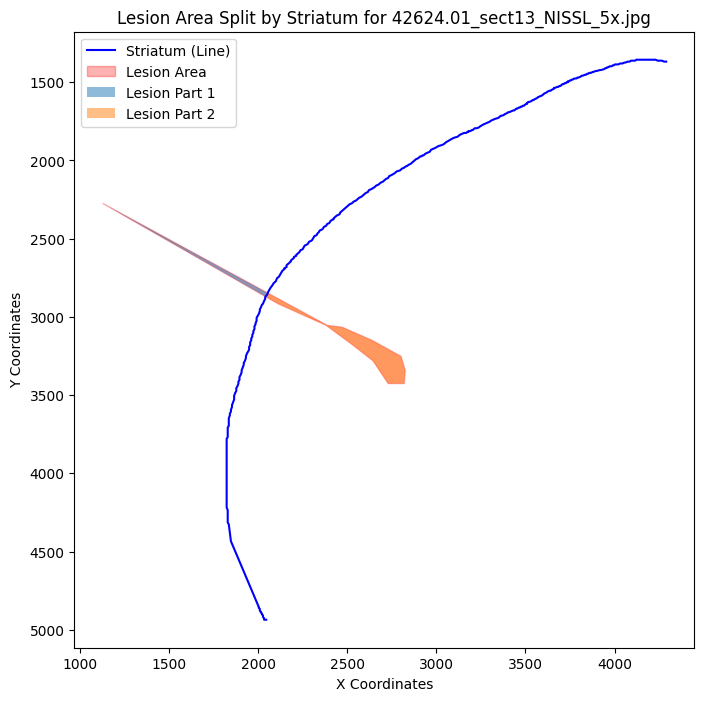

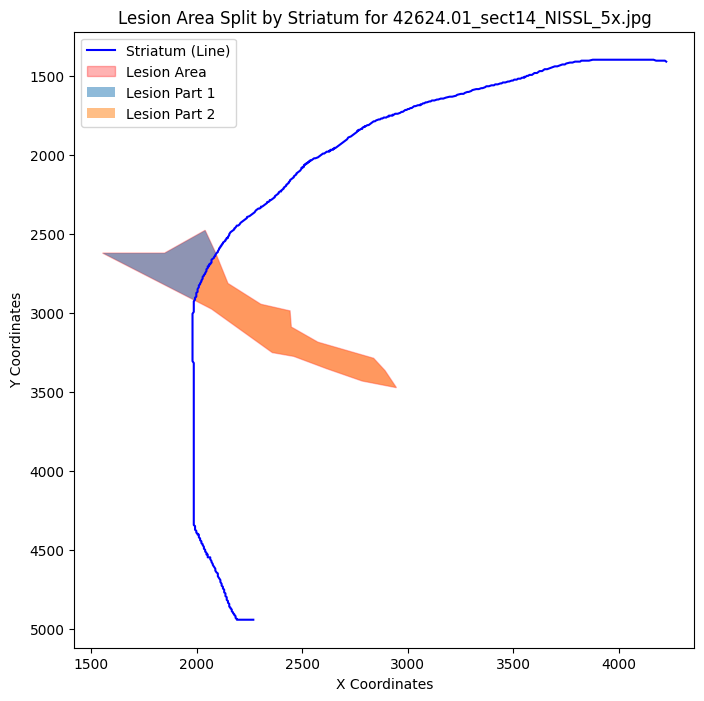

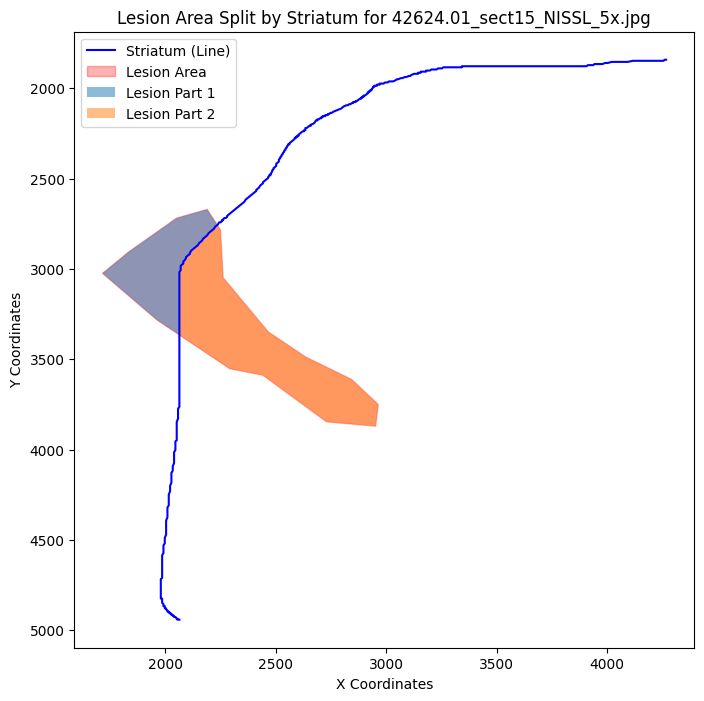

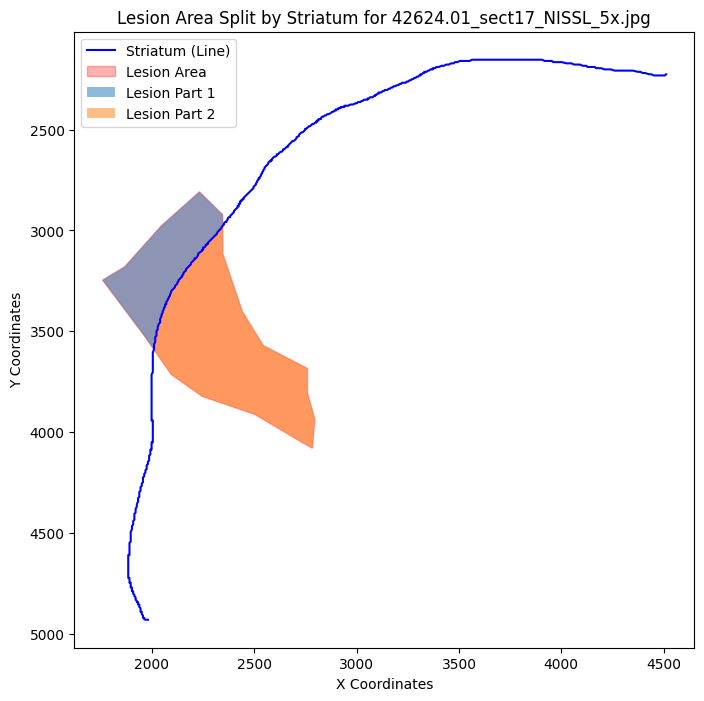

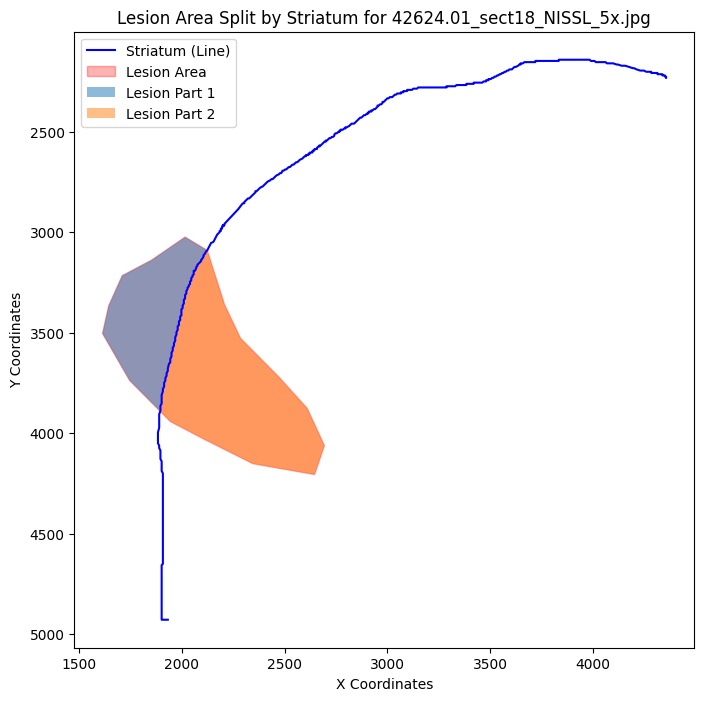

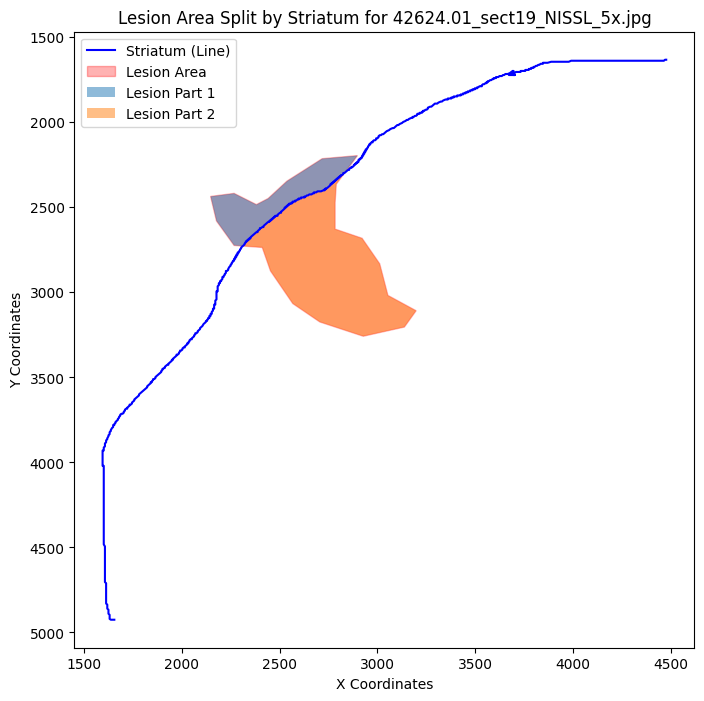

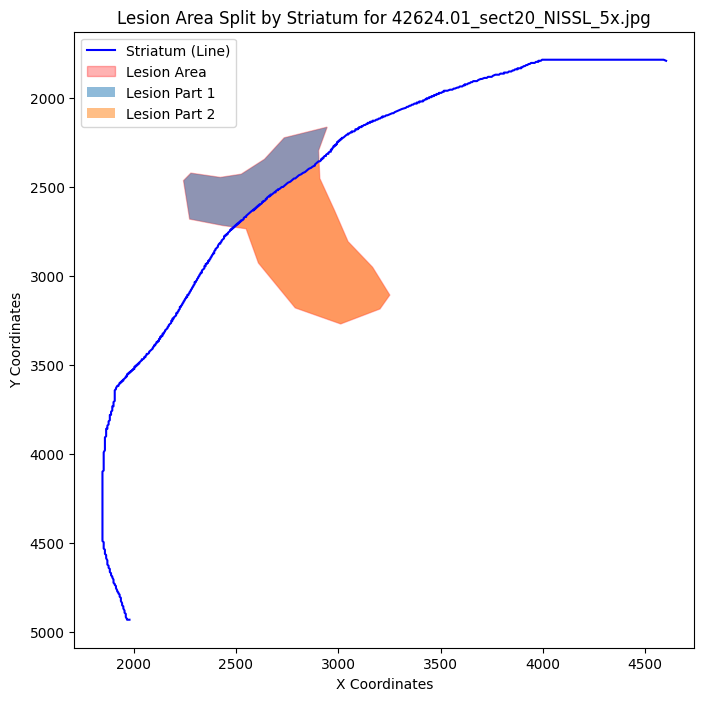

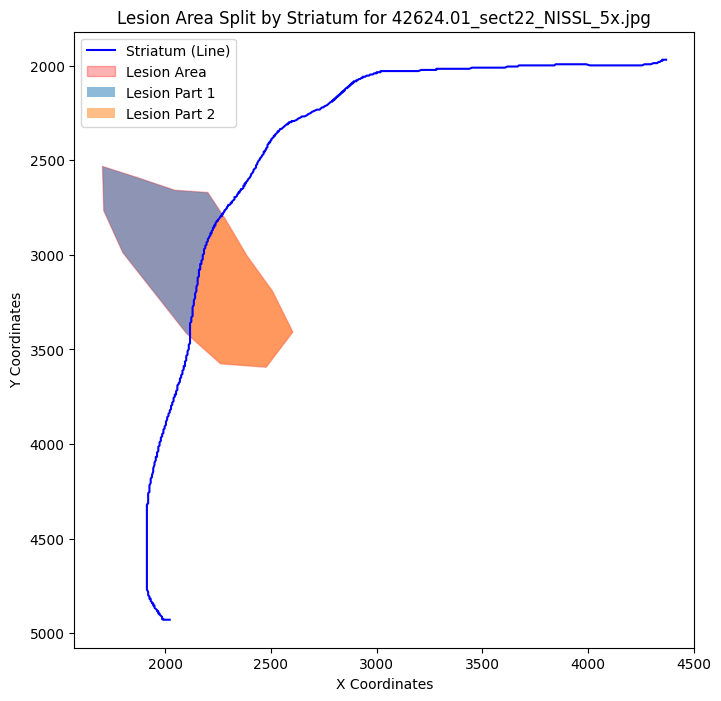

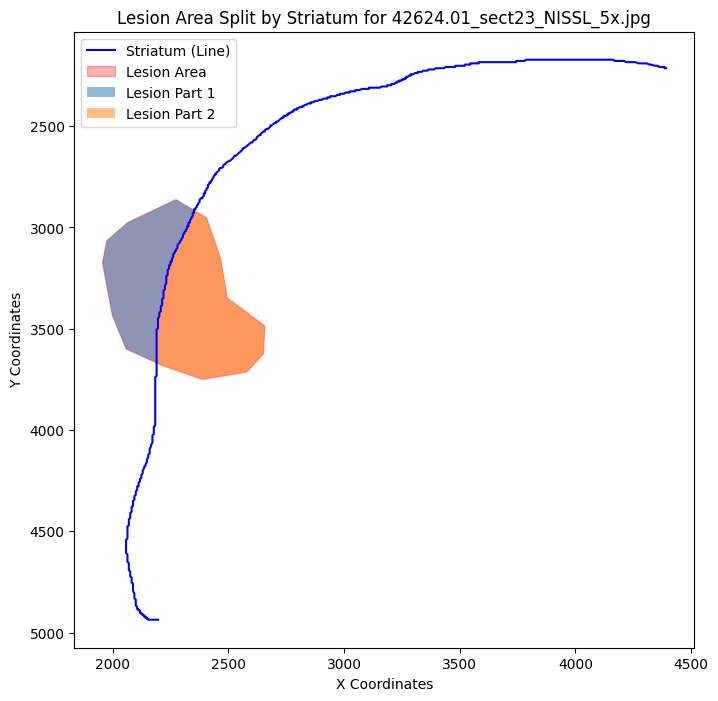

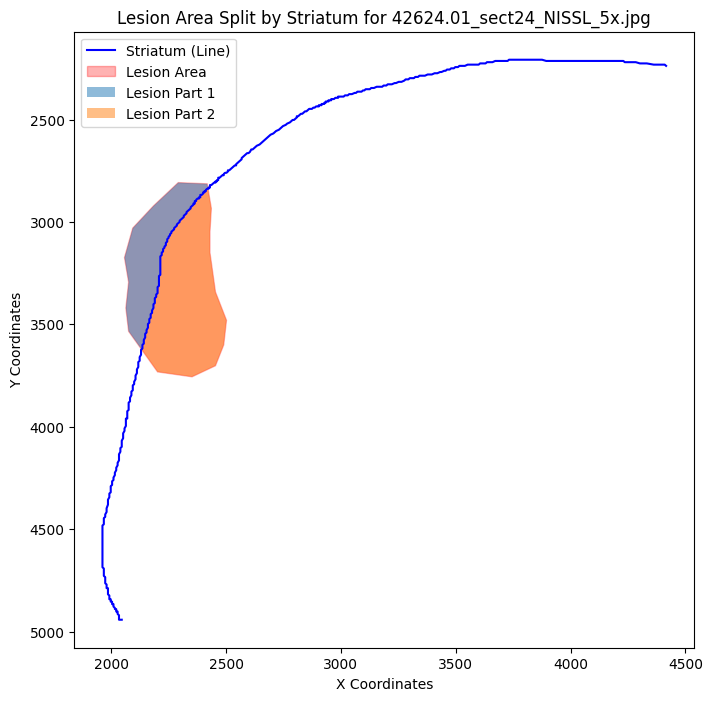

Analysis complete. Results saved to 'lesion_analysis_results_with_section_volume.csv'.
                     Image Name  Section Number  Effective Thickness (um)  \
0  42624.01_sect10_NISSL_5x.jpg              10                        75   
1  42624.01_sect11_NISSL_5x.jpg              11                        75   
2  42624.01_sect12_NISSL_5x.jpg              12                        75   
3  42624.01_sect13_NISSL_5x.jpg              13                        75   
4  42624.01_sect14_NISSL_5x.jpg              14                        75   
5  42624.01_sect15_NISSL_5x.jpg              15                        75   
6  42624.01_sect17_NISSL_5x.jpg              17                       150   
7  42624.01_sect18_NISSL_5x.jpg              18                        75   
8  42624.01_sect19_NISSL_5x.jpg              19                        75   
9  42624.01_sect20_NISSL_5x.jpg              20                        75   

   Lesion Area (um^2)  Lesion Volume (um^3)  Area X Area (um^2)  

In [3]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.ops import split
import re

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)
# Define results path to save in the same folder as csv_path
results_folder = os.path.dirname(csv_path)
results_path = os.path.join(results_folder, 'lesion_analysis_results_with_section_volume.csv')


# Define constants for pixel-to-micron conversion
section_thickness = 75
conversion_factor = 500 / 568  # conversion factor from pixels to microns

# Helper functions
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

def get_section_number(image_name):
    match = re.search(r'sect(\d+)', image_name)
    return int(match.group(1)) if match else None

# Initialize an empty list to store results
results = []

# Sort the DataFrame by section number to handle non-sequential sections
df['Section Number'] = df['Image Name'].apply(get_section_number)
df = df.sort_values('Section Number').reset_index(drop=True)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Parse coordinates
    striatum_x = parse_coords(row['Striatum_x_coords'])
    striatum_y = parse_coords(row['Striatum_y_coords'])
    lesion_x = parse_coords(row['Lesion_x_coords'])
    lesion_y = parse_coords(row['Lesion_y_coords'])
    area_x_x = parse_coords(row['Area_X_x_coords'])
    area_x_y = parse_coords(row['Area_X_y_coords'])
    lman_x = parse_coords(row['LMAN_x_coords'])
    lman_y = parse_coords(row['LMAN_y_coords'])

    # Get the section number from the image name
    section_number = row['Section Number']

    # Create Polygon and LineString objects
    lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
    area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
    lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
    striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

    # Calculate areas in pixels
    lesion_area = lesion_polygon.area if lesion_polygon else 0
    area_x_area = area_x_polygon.area if area_x_polygon else 0
    lman_area = lman_polygon.area if lman_polygon else 0
    overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0
    overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0

    # Calculate areas in microns
    lesion_area_um2 = lesion_area * (conversion_factor ** 2)
    area_x_area_um2 = area_x_area * (conversion_factor ** 2)
    lman_area_um2 = lman_area * (conversion_factor ** 2)
    overlap_area_x_um2 = overlap_area_x * (conversion_factor ** 2)
    overlap_area_lman_um2 = overlap_area_lman * (conversion_factor ** 2)

    # Determine effective thickness based on gaps between section numbers
    if index == 0:
        effective_thickness = section_thickness  # no previous section
    else:
        previous_section = df.loc[index - 1, 'Section Number']
        section_gap = section_number - previous_section
        effective_thickness = section_gap * section_thickness

    # Calculate volumes by multiplying area by effective thickness
    lesion_volume = lesion_area_um2 * effective_thickness
    area_x_volume = area_x_area_um2 * effective_thickness
    lman_volume = lman_area_um2 * effective_thickness
    overlap_volume_x = overlap_area_x_um2 * effective_thickness
    overlap_volume_lman = overlap_area_lman_um2 * effective_thickness

    # Initialize split areas
    inside_area, outside_area = 0, 0
    inside_area_um2, outside_area_um2 = 0, 0
    inside_volume, outside_volume = 0, 0

    # Split lesion by striatum line if intersecting
    if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
        split_polygons = split(lesion_polygon, striatum_line)
        if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
            area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
            area_side_1_um2, area_side_2_um2 = [area * (conversion_factor ** 2) for area in [area_side_1, area_side_2]]
            volume_side_1, volume_side_2 = [area * effective_thickness for area in [area_side_1_um2, area_side_2_um2]]
            
            # Plot for user identification
            plt.figure(figsize=(8, 8))
            if striatum_line:
                x, y = striatum_line.xy
                plt.plot(x, y, color='blue', label='Striatum (Line)')
            if lesion_polygon:
                x, y = lesion_polygon.exterior.xy
                plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
            for i, poly in enumerate(split_polygons.geoms):
                x, y = poly.exterior.xy
                plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
            plt.xlabel("X Coordinates")
            plt.ylabel("Y Coordinates")
            plt.title(f"Lesion Area Split by Striatum for {row['Image Name']}")
            plt.legend()
            plt.gca().invert_yaxis()
            plt.show()

            # Prompt for striatum part identification
            striatum_part = input(f"Enter the part number (1 or 2) that is within the striatum for {row['Image Name']}: ")

            # Set areas based on input
            if striatum_part == '1':
                inside_area, outside_area = area_side_1, area_side_2
                inside_area_um2, outside_area_um2 = area_side_1_um2, area_side_2_um2
                inside_volume, outside_volume = volume_side_1, volume_side_2
            elif striatum_part == '2':
                inside_area, outside_area = area_side_2, area_side_1
                inside_area_um2, outside_area_um2 = area_side_2_um2, area_side_1_um2
                inside_volume, outside_volume = volume_side_2, volume_side_1
            else:
                print("Invalid input. Setting inside and outside areas to 0.")

    # Append results
    results.append({
        "Image Name": row['Image Name'],
        "Section Number": section_number,
        "Effective Thickness (um)": effective_thickness,
        "Lesion Area (um^2)": lesion_area_um2,
        "Lesion Volume (um^3)": lesion_volume,
        "Area X Area (um^2)": area_x_area_um2,
        "Area X Volume (um^3)": area_x_volume,
        "LMAN Area (um^2)": lman_area_um2,
        "LMAN Volume (um^3)": lman_volume,
        "Overlap Area with Area X (um^2)": overlap_area_x_um2,
        "Overlap Volume with Area X (um^3)": overlap_volume_x,
        "Overlap Area with LMAN (um^2)": overlap_area_lman_um2,
        "Overlap Volume with LMAN (um^3)": overlap_volume_lman,
        "Lesion Area inside Striatum (Posterior) (um^2)": inside_area_um2,
        "Lesion Volume inside Striatum (um^3)": inside_volume,
        "Lesion Area outside Striatum (Anterior) (um^2)": outside_area_um2,
        "Lesion Volume outside Striatum (um^3)": outside_volume
    })

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv(results_path, index=False)

print("Analysis complete. Results saved to 'lesion_analysis_results_with_section_volume.csv'.")
print(results_df.head(10))

# Now, calculate the volumes and percentages lesioned

In [17]:
import pandas as pd

# Load the results DataFrame
results_df = pd.read_csv('lesion_analysis_results_with_section_volume.csv')

# 1) Total volume of Area X
total_area_x_volume = results_df['Area X Volume (um^3)'].sum()

# 2) Volume of lesion overlap with Area X
total_overlap_volume_x = results_df['Overlap Volume with Area X (um^3)'].sum()

# 3) Percent of Area X that overlapped with the lesion (percent of Area X lesioned)
percent_area_x_lesioned = (total_overlap_volume_x / total_area_x_volume) * 100 if total_area_x_volume != 0 else 0

# 4) Total volume of LMAN
total_lman_volume = results_df['LMAN Volume (um^3)'].sum()

# 5) Total volume of lesion overlap with LMAN
total_overlap_volume_lman = results_df['Overlap Volume with LMAN (um^3)'].sum()

# 6) Percent of LMAN that overlapped with the lesion (percent of LMAN lesioned)
percent_lman_lesioned = (total_overlap_volume_lman / total_lman_volume) * 100 if total_lman_volume != 0 else 0

# 7) Total volume of lesion that was outside the striatum (Anterior)
total_lesion_outside_striatum_volume = results_df['Lesion Volume outside Striatum (um^3)'].sum()

# Compile results into a dictionary for easy reference
tallied_results = {
    "Total Volume of Area X (um^3)": total_area_x_volume,
    "Volume of Lesion Overlap with Area X (um^3)": total_overlap_volume_x,
    "Percent of Area X Lesioned (%)": percent_area_x_lesioned,
    "Total Volume of LMAN (um^3)": total_lman_volume,
    "Volume of Lesion Overlap with LMAN (um^3)": total_overlap_volume_lman,
    "Percent of LMAN Lesioned (%)": percent_lman_lesioned,
    "Total Volume of Lesion Outside Striatum (Anterior) (um^3)": total_lesion_outside_striatum_volume
}

# Print the results
for key, value in tallied_results.items():
    print(f"{key}: {value}")


Total Volume of Area X (um^3): 244249807.8258282
Volume of Lesion Overlap with Area X (um^3): 94990983.66740842
Percent of Area X Lesioned (%): 38.890914393326945
Total Volume of LMAN (um^3): 30217916.2120611
Volume of Lesion Overlap with LMAN (um^3): 0.0
Percent of LMAN Lesioned (%): 0.0
Total Volume of Lesion Outside Striatum (Anterior) (um^3): 95991659.12599604


# Let's see if I can get a plot of Area X and the lesion

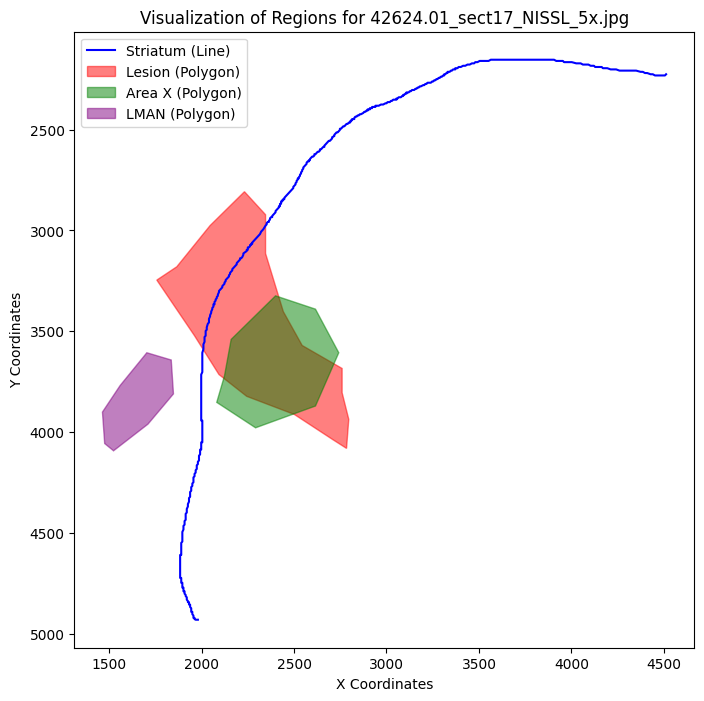

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # to convert coordinate strings to lists

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization
selected_row = df.iloc[6]  # You can change the index to visualize another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse the coordinates for each area
striatum_x = parse_coords(selected_row['Striatum_x_coords'])
striatum_y = parse_coords(selected_row['Striatum_y_coords'])
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])
lman_x = parse_coords(selected_row['LMAN_x_coords'])
lman_y = parse_coords(selected_row['LMAN_y_coords'])

# Plot the areas
plt.figure(figsize=(8, 8))
if striatum_x and striatum_y:
    plt.plot(striatum_x, striatum_y, label='Striatum (Line)', color='blue')
if lesion_x and lesion_y:
    plt.fill(lesion_x, lesion_y, label='Lesion (Polygon)', color='red', alpha=0.5)
if area_x_x and area_x_y:
    plt.fill(area_x_x, area_x_y, label='Area X (Polygon)', color='green', alpha=0.5)
if lman_x and lman_y:
    plt.fill(lman_x, lman_y, label='LMAN (Polygon)', color='purple', alpha=0.5)

# Customize plot
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Visualization of Regions for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()  # Invert Y axis to match typical image coordinate systems
plt.show()

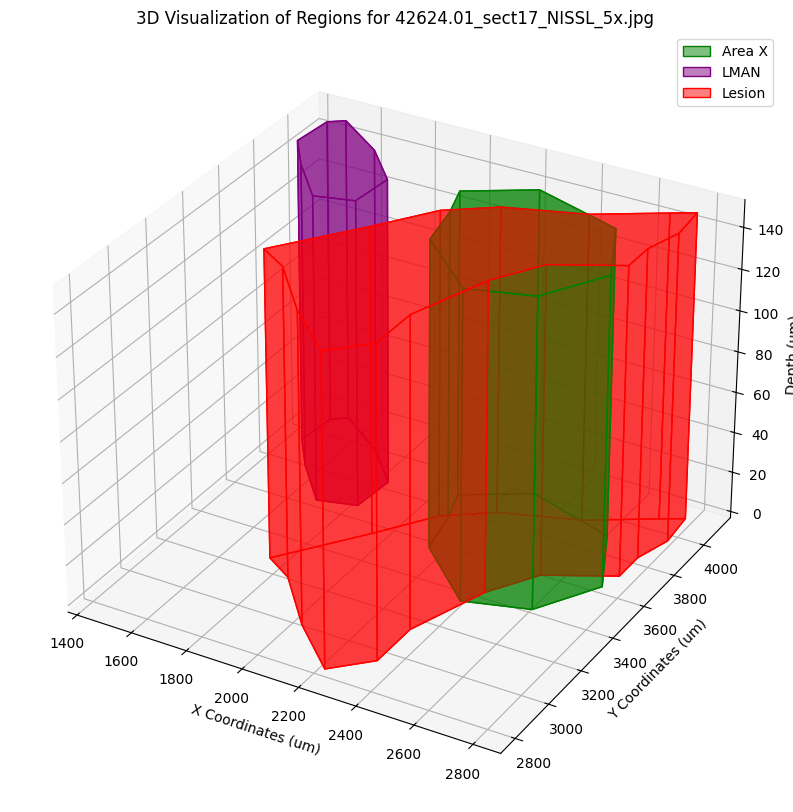

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely.geometry import Polygon
import ast  # to convert coordinate strings to lists

# Load coordinate data into df
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Load calculated data, including effective thickness, into results_df
results_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/lesion_analysis_results_with_section_volume.csv'
results_df = pd.read_csv(results_path)

# Select a row index for visualization
selected_row_index = 6  # Adjust as needed to visualize a different row
selected_row_df = df.iloc[selected_row_index]  # Row from df with coordinate data
selected_row_results = results_df.iloc[selected_row_index]  # Row from results_df with effective thickness

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    return ast.literal_eval(coord_string) if pd.notnull(coord_string) else None

# Extract coordinates and effective thickness for each region
area_x_x = parse_coords(selected_row_df['Area_X_x_coords'])
area_x_y = parse_coords(selected_row_df['Area_X_y_coords'])
lman_x = parse_coords(selected_row_df['LMAN_x_coords'])
lman_y = parse_coords(selected_row_df['LMAN_y_coords'])
lesion_x = parse_coords(selected_row_df['Lesion_x_coords'])
lesion_y = parse_coords(selected_row_df['Lesion_y_coords'])

effective_thickness = selected_row_results['Effective Thickness (um)']  # Ensure column name matches

# Set up the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Function to plot a 3D prism for a region
def plot_region_3d(ax, x_coords, y_coords, thickness, color, label):
    if x_coords and y_coords:
        poly = Polygon(zip(x_coords, y_coords))
        x, y = poly.exterior.xy
        z_base = 0
        z_top = z_base + thickness
        
        # Add top and bottom faces
        ax.add_collection3d(Poly3DCollection([list(zip(x, y, [z_base] * len(x)))], color=color, alpha=0.5, label=label))
        ax.add_collection3d(Poly3DCollection([list(zip(x, y, [z_top] * len(x)))], color=color, alpha=0.5))

        # Create side faces connecting top and bottom
        for i in range(len(x) - 1):
            verts = [(x[i], y[i], z_base), (x[i + 1], y[i + 1], z_base),
                     (x[i + 1], y[i + 1], z_top), (x[i], y[i], z_top)]
            ax.add_collection3d(Poly3DCollection([verts], color=color, alpha=0.5))

# Plot each region as a 3D prism using the coordinates from df and thickness from results_df
plot_region_3d(ax, area_x_x, area_x_y, effective_thickness, color='green', label='Area X')
plot_region_3d(ax, lman_x, lman_y, effective_thickness, color='purple', label='LMAN')
plot_region_3d(ax, lesion_x, lesion_y, effective_thickness, color='red', label='Lesion')

# Customize the 3D plot
ax.set_xlabel("X Coordinates (um)")
ax.set_ylabel("Y Coordinates (um)")
ax.set_zlabel("Depth (um)")
ax.set_title(f"3D Visualization of Regions for {selected_row_df['Image Name']}")
plt.legend(loc='best')
plt.show()


/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_97222/1021995634.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


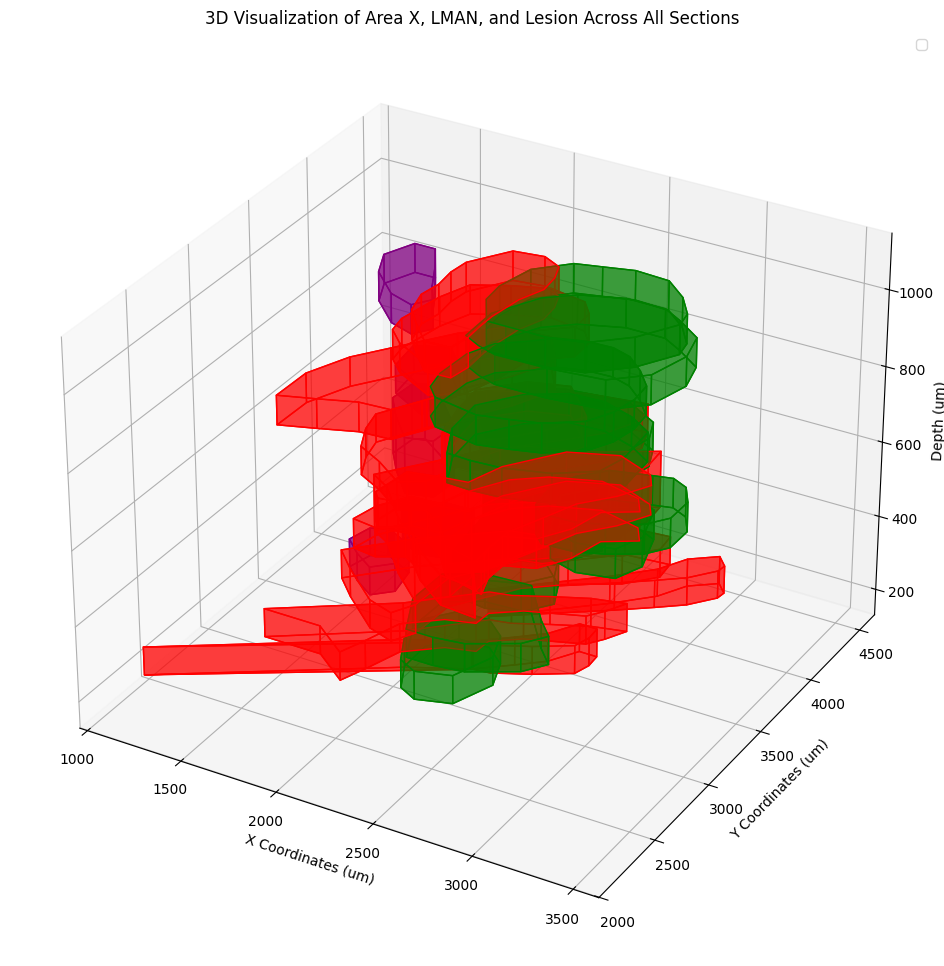

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely.geometry import Polygon
import ast  # to convert coordinate strings to lists

# Load coordinate data into df
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Load calculated data, including effective thickness, into results_df
results_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/lesion_analysis_results_with_section_volume.csv'
results_df = pd.read_csv(results_path)

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if pd.isnull(coord_string) or coord_string.lower() == "none present":
        return None
    return ast.literal_eval(coord_string)

# Set up the 3D plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Function to plot a 3D prism for a region
def plot_region_3d(ax, x_coords, y_coords, z_base, thickness, color, label=None):
    if x_coords and y_coords:
        poly = Polygon(zip(x_coords, y_coords))
        x, y = poly.exterior.xy
        z_top = z_base + thickness
        
        # Add top and bottom faces
        ax.add_collection3d(Poly3DCollection([list(zip(x, y, [z_base] * len(x)))], color=color, alpha=0.5, label=label))
        ax.add_collection3d(Poly3DCollection([list(zip(x, y, [z_top] * len(x)))], color=color, alpha=0.5))

        # Create side faces connecting top and bottom
        for i in range(len(x) - 1):
            verts = [(x[i], y[i], z_base), (x[i + 1], y[i + 1], z_base),
                     (x[i + 1], y[i + 1], z_top), (x[i], y[i], z_top)]
            ax.add_collection3d(Poly3DCollection([verts], color=color, alpha=0.5))

# Initialize the z-axis base for stacking each row's regions
z_base = 0

# Loop over each row in the DataFrame to plot each section as a 3D prism
for index, row in df.iterrows():
    # Extract coordinates for each region from the current row in df
    area_x_x = parse_coords(row['Area_X_x_coords'])
    area_x_y = parse_coords(row['Area_X_y_coords'])
    lman_x = parse_coords(row['LMAN_x_coords'])
    lman_y = parse_coords(row['LMAN_y_coords'])
    lesion_x = parse_coords(row['Lesion_x_coords'])
    lesion_y = parse_coords(row['Lesion_y_coords'])
    
    # Get effective thickness from the corresponding row in results_df
    effective_thickness = results_df.loc[index, 'Effective Thickness (um)']
    
    # Plot each region as a 3D prism if coordinates are present
    if area_x_x and area_x_y:
        plot_region_3d(ax, area_x_x, area_x_y, z_base, effective_thickness, color='green', label='Area X' if index == 0 else "")
    if lman_x and lman_y:
        plot_region_3d(ax, lman_x, lman_y, z_base, effective_thickness, color='purple', label='LMAN' if index == 0 else "")
    if lesion_x and lesion_y:
        plot_region_3d(ax, lesion_x, lesion_y, z_base, effective_thickness, color='red', label='Lesion' if index == 0 else "")
    
    # Update z_base for the next section
    z_base += effective_thickness

# Customize the 3D plot
ax.set_xlabel("X Coordinates (um)")
ax.set_ylabel("Y Coordinates (um)")
ax.set_zlabel("Depth (um)")
ax.set_title("3D Visualization of Area X, LMAN, and Lesion Across All Sections")
plt.legend(loc='best')
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely.geometry import Polygon
import ast  # to convert coordinate strings to lists

# Enable interactive mode for 3D plotting in Jupyter
%matplotlib widget

# Load coordinate data into df
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Load calculated data, including effective thickness, into results_df
results_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/for_rose_3_output_ROIs/USA5288_042624.01_ROIs/lesion_analysis_results_with_section_volume.csv'
results_df = pd.read_csv(results_path)

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if pd.isnull(coord_string) or coord_string.lower() == "none present":
        return None
    return ast.literal_eval(coord_string)

# Set up the 3D plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Function to plot a 3D prism for a region
def plot_region_3d(ax, x_coords, y_coords, z_base, thickness, color, label=None):
    if x_coords and y_coords:
        poly = Polygon(zip(x_coords, y_coords))
        x, y = poly.exterior.xy
        z_top = z_base + thickness
        
        # Add top and bottom faces
        ax.add_collection3d(Poly3DCollection([list(zip(x, y, [z_base] * len(x)))], color=color, alpha=0.5, label=label))
        ax.add_collection3d(Poly3DCollection([list(zip(x, y, [z_top] * len(x)))], color=color, alpha=0.5))

        # Create side faces connecting top and bottom
        for i in range(len(x) - 1):
            verts = [(x[i], y[i], z_base), (x[i + 1], y[i + 1], z_base),
                     (x[i + 1], y[i + 1], z_top), (x[i], y[i], z_top)]
            ax.add_collection3d(Poly3DCollection([verts], color=color, alpha=0.5))

# Initialize the z-axis base for stacking each row's regions
z_base = 0
added_labels = set()  # Track labels to avoid duplicates

# Loop over each row in the DataFrame to plot each section as a 3D prism
for index, row in df.iterrows():
    # Extract coordinates for each region from the current row in df
    area_x_x = parse_coords(row['Area_X_x_coords'])
    area_x_y = parse_coords(row['Area_X_y_coords'])
    lman_x = parse_coords(row['LMAN_x_coords'])
    lman_y = parse_coords(row['LMAN_y_coords'])
    lesion_x = parse_coords(row['Lesion_x_coords'])
    lesion_y = parse_coords(row['Lesion_y_coords'])
    
    # Get effective thickness from the corresponding row in results_df
    effective_thickness = results_df.loc[index, 'Effective Thickness (um)']
    
    # Plot each region as a 3D prism if coordinates are present, and label once
    if area_x_x and area_x_y:
        label = 'Area X' if 'Area X' not in added_labels else None
        plot_region_3d(ax, area_x_x, area_x_y, z_base, effective_thickness, color='green', label=label)
        added_labels.add('Area X')
    if lman_x and lman_y:
        label = 'LMAN' if 'LMAN' not in added_labels else None
        plot_region_3d(ax, lman_x, lman_y, z_base, effective_thickness, color='purple', label=label)
        added_labels.add('LMAN')
    if lesion_x and lesion_y:
        label = 'Lesion' if 'Lesion' not in added_labels else None
        plot_region_3d(ax, lesion_x, lesion_y, z_base, effective_thickness, color='red', label=label)
        added_labels.add('Lesion')
    
    # Update z_base for the next section
    z_base += effective_thickness

# Customize the 3D plot
ax.set_xlabel("X Coordinates (um)")
ax.set_ylabel("Y Coordinates (um)")
ax.set_zlabel("Depth (um)")
ax.set_title("3D Visualization of Area X, LMAN, and Lesion Across All Sections")

# Only add the legend if there are labeled artists
if added_labels:
    plt.legend(loc='best')

plt.show()


RuntimeError: 'widget is not a recognised GUI loop or backend name

In [17]:
%matplotlib widget
import matplotlib.pyplot as plt

# Now, you can use plt.figure() and other Matplotlib functions
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 5, 6])
plt.show()


RuntimeError: 'widget is not a recognised GUI loop or backend name